Importing Required Libraries

In [25]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from sklearn import datasets

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
 

In [26]:
# Loading pre-defined Boston Dataset

boston_dataset = datasets.load_boston()
boston_dataset.DESCR

c:\Users\Admin\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

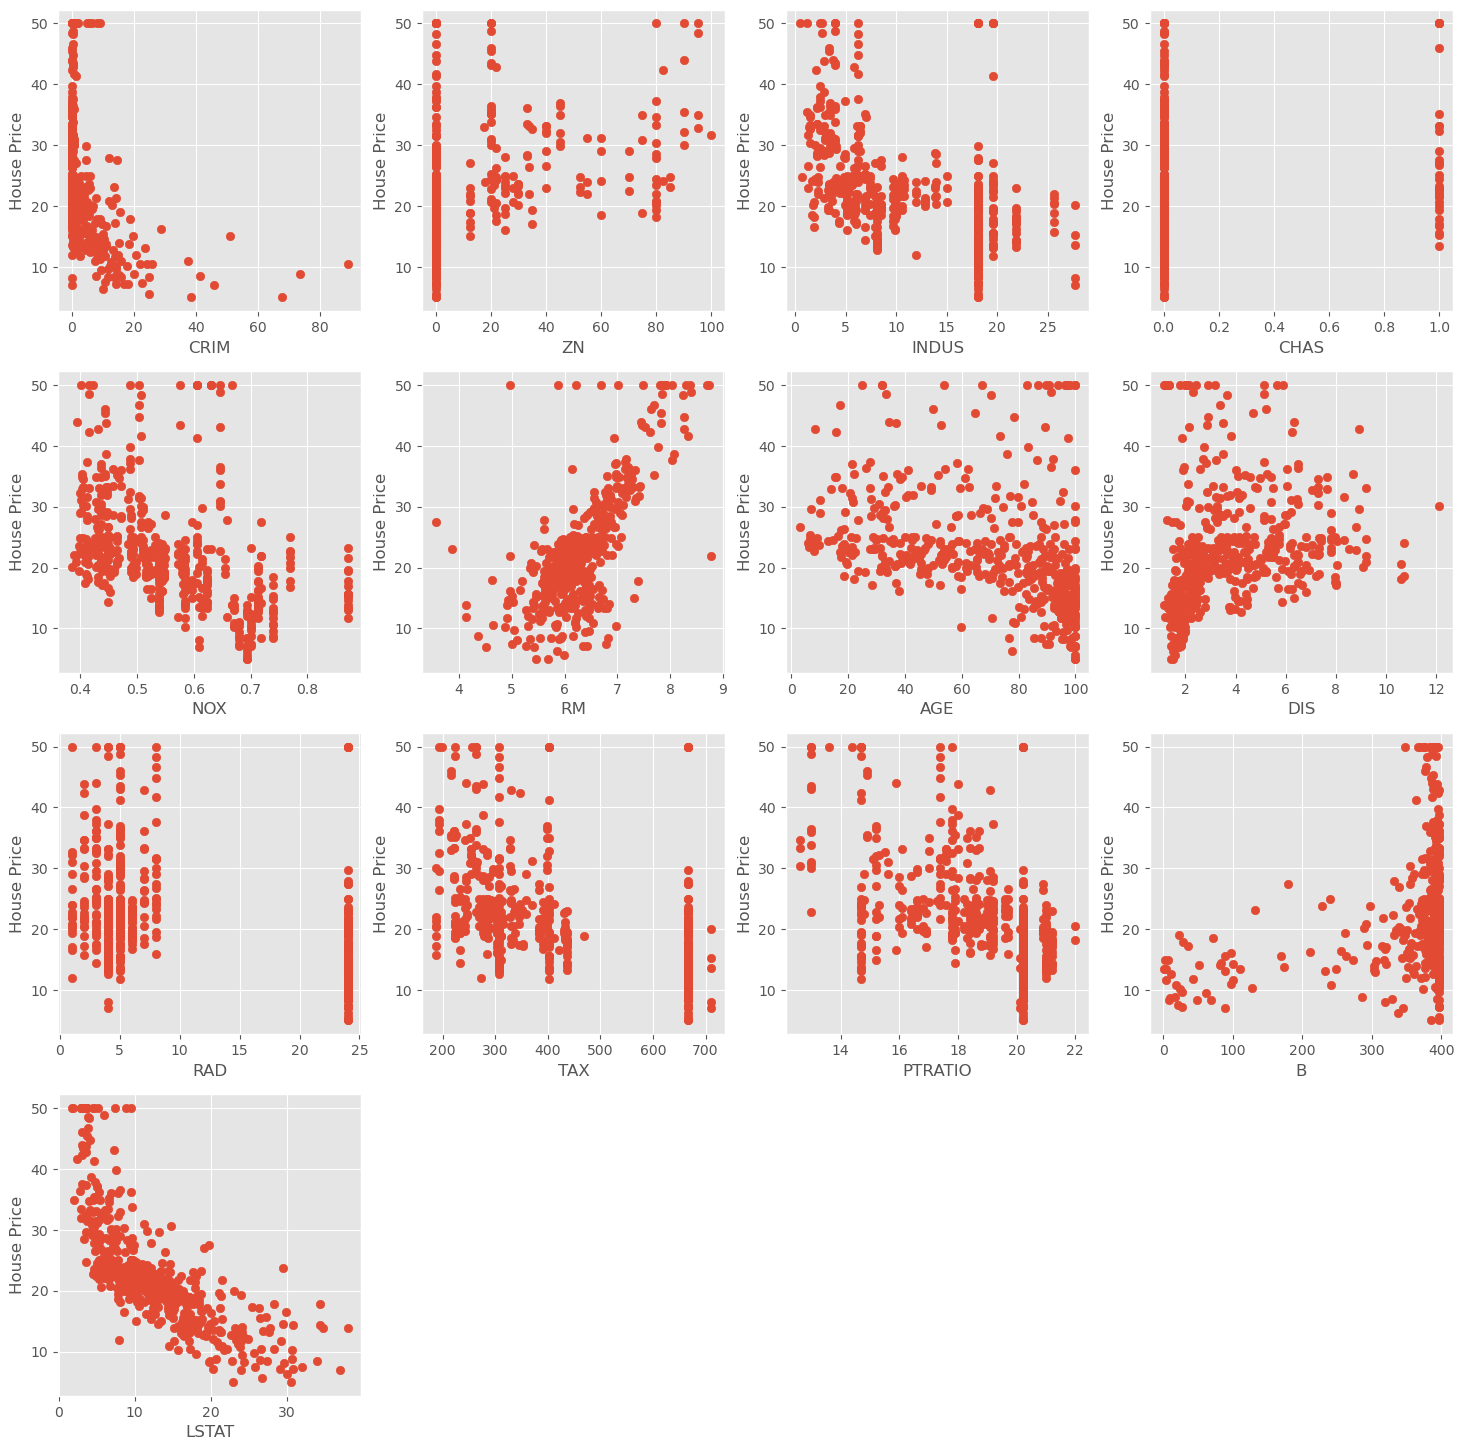

In [27]:
# Generate scatter plot of independent vs Dependent variable

plt.style.use('ggplot')

fig = plt.figure(figsize = (18, 18))
 

for index, feature_name in enumerate(boston_dataset.feature_names):

    ax = fig.add_subplot(4, 4, index + 1)

    ax.scatter(boston_dataset.data[:, index], boston_dataset.target)

    ax.set_ylabel('House Price', size = 12)

    ax.set_xlabel(feature_name, size = 12)
 
plt.show()

We can observe from the above scatter plots that some of the independent variables are not very much correlated (either positively or negatively) with the target variable. We will use regularization to reduce the coefficients of these independent variables

In [28]:

# Load the dataset into Pandas Dataframe

df = pd.DataFrame(boston_dataset.data)

df.columns = boston_dataset.feature_names

df_target = np.asarray(boston_dataset.target)

df['House Price'] = pd.Series(df_target)
 
# dependent variables(input) 

X = df.iloc[:, :-1]
 
#dependent variable(output)

Y = df.iloc[:, -1]
 

print(df.head())
 

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  House Price  
0     15.3  396.90   4.98         24.0  
1     17.8  396.90   9.14         21.6  
2     17.8  392.83   4.03         34.7  
3     18.7  394.63   2.94         33.4  
4     18.7  396.90   5.33         36.2  


In [29]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size = 0.25)

Linear Regression Model

In [30]:
# Apply Linear Regression Model

lr = LinearRegression()
lr.fit(x_train, y_train)
 
# Generate Prediction on test set

lr_pred = lr.predict(x_test)
 
# calculating Mean Squared Error (mse)

mean_squared_error = np.mean((lr_pred - y_test)**2)

print("Mean squared Error on test set : ", mean_squared_error)
 
# Putting together the coefficient and their corresponding variable names 

lr_coefficient = pd.DataFrame()

lr_coefficient["Columns"] = x_train.columns

lr_coefficient['Coefficient Estimate'] = pd.Series(lr.coef_)

print(lr_coefficient)

Mean squared Error on test set :  21.450053562931526
    Columns  Coefficient Estimate
0      CRIM             -0.109059
1        ZN              0.057779
2     INDUS             -0.008820
3      CHAS              3.272134
4       NOX            -19.911096
5        RM              3.433019
6       AGE              0.008700
7       DIS             -1.567011
8       RAD              0.323962
9       TAX             -0.012077
10  PTRATIO             -0.861443
11        B              0.010084
12    LSTAT             -0.523749


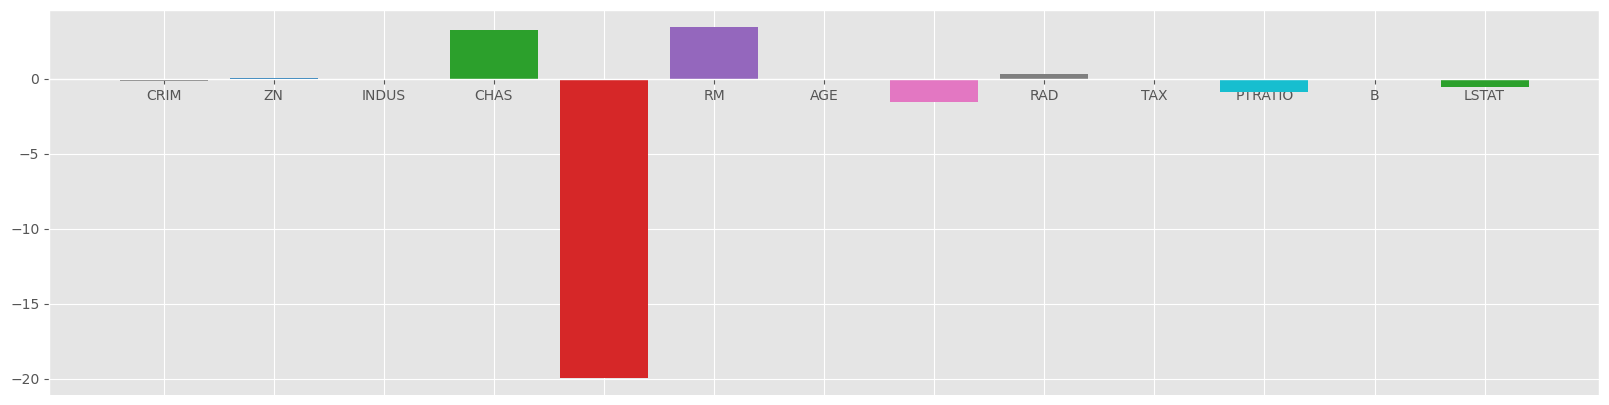

In [31]:

# plotting the coefficient score

fig, ax = plt.subplots(figsize =(20, 5))
 

color =['tab:gray', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 
'tab:olive', 'tab:cyan', 'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']
 

ax.bar(lr_coefficient["Columns"], 

lr_coefficient['Coefficient Estimate'], color = color)
 

ax.spines['bottom'].set_position('zero')
 

plt.style.use('ggplot')
plt.show()

Ridge Regression

In [32]:

# import ridge regression from sklearn library

from sklearn.linear_model import Ridge
 
# Train the model 

ridge = Ridge(alpha = 1)
ridge.fit(x_train, y_train)

pred = ridge.predict(x_test)
 
# calculate mean square error

mean_squared_error_ridge = np.mean((pred - y_test)**2)

print(mean_squared_error_ridge)
 
# get ridge coefficient and print them

ridge_coefficient = pd.DataFrame()

ridge_coefficient["Columns"]= x_train.columns

ridge_coefficient['Coefficient Estimate'] = pd.Series(ridge.coef_)

print(ridge_coefficient)

21.212807386086585
    Columns  Coefficient Estimate
0      CRIM             -0.104567
1        ZN              0.059293
2     INDUS             -0.050217
3      CHAS              3.141626
4       NOX            -11.049280
5        RM              3.530828
6       AGE              0.000613
7       DIS             -1.433785
8       RAD              0.303947
9       TAX             -0.012822
10  PTRATIO             -0.750812
11        B              0.010730
12    LSTAT             -0.529982


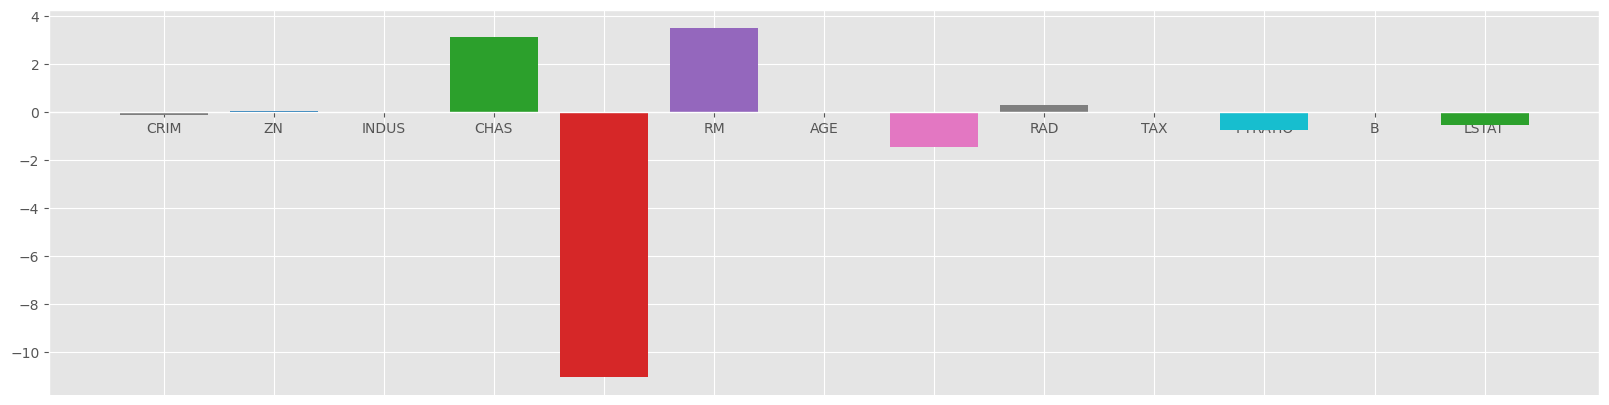

In [33]:
# plotting the coefficient score

fig, ax = plt.subplots(figsize =(20, 5))
 

color =['tab:gray', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 
'tab:gray', 'tab:olive', 'tab:cyan', 'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']
 

ax.bar(ridge_coefficient["Columns"], 
ridge_coefficient['Coefficient Estimate'], color = color)
 

ax.spines['bottom'].set_position('zero')
 

plt.style.use('ggplot')
plt.show()

21.38258827744625


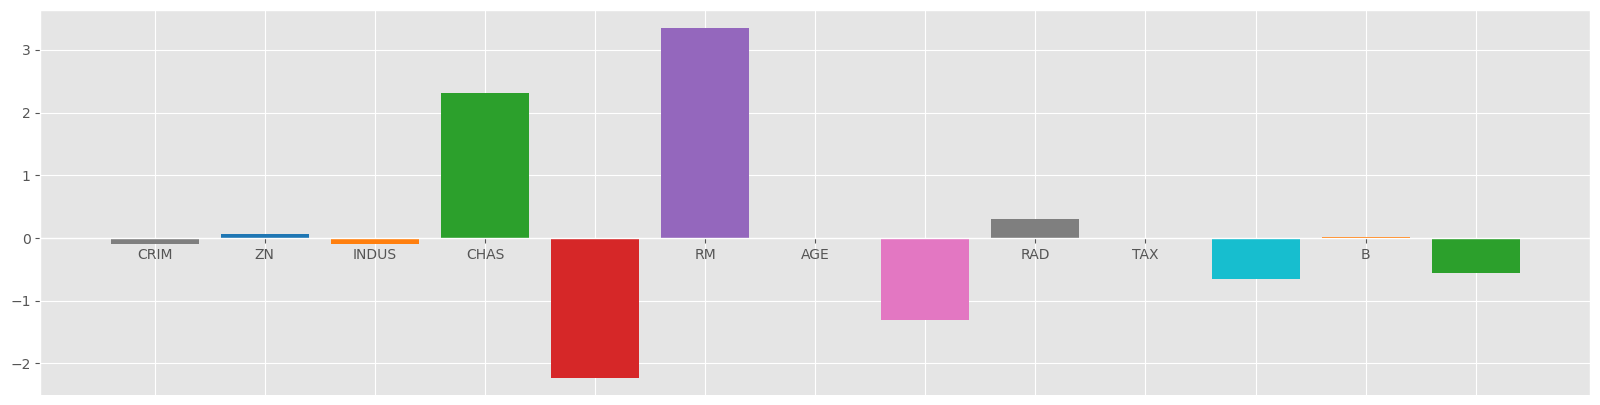

In [34]:
# implement ridge regression by increasing the value of alpha
r= Ridge(alpha = 10)
r.fit(x_train, y_train)

pred = r.predict(x_test)
 
# calculate mean square error

mean_squared_error_r = np.mean((pred - y_test)**2)

print(mean_squared_error_r)
 
# get ridge coefficient and print them

r_coefficient = pd.DataFrame()

r_coefficient["Columns"]= x_train.columns

r_coefficient['Coefficient Estimate'] = pd.Series(r.coef_)

# plotting the coefficient score

fig, ax = plt.subplots(figsize =(20, 5))
 

color =['tab:gray', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 
'tab:gray', 'tab:olive', 'tab:cyan', 'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']
 

ax.bar(r_coefficient["Columns"], 
r_coefficient['Coefficient Estimate'], color = color)
 

ax.spines['bottom'].set_position('zero')
 

plt.style.use('ggplot')
plt.show()

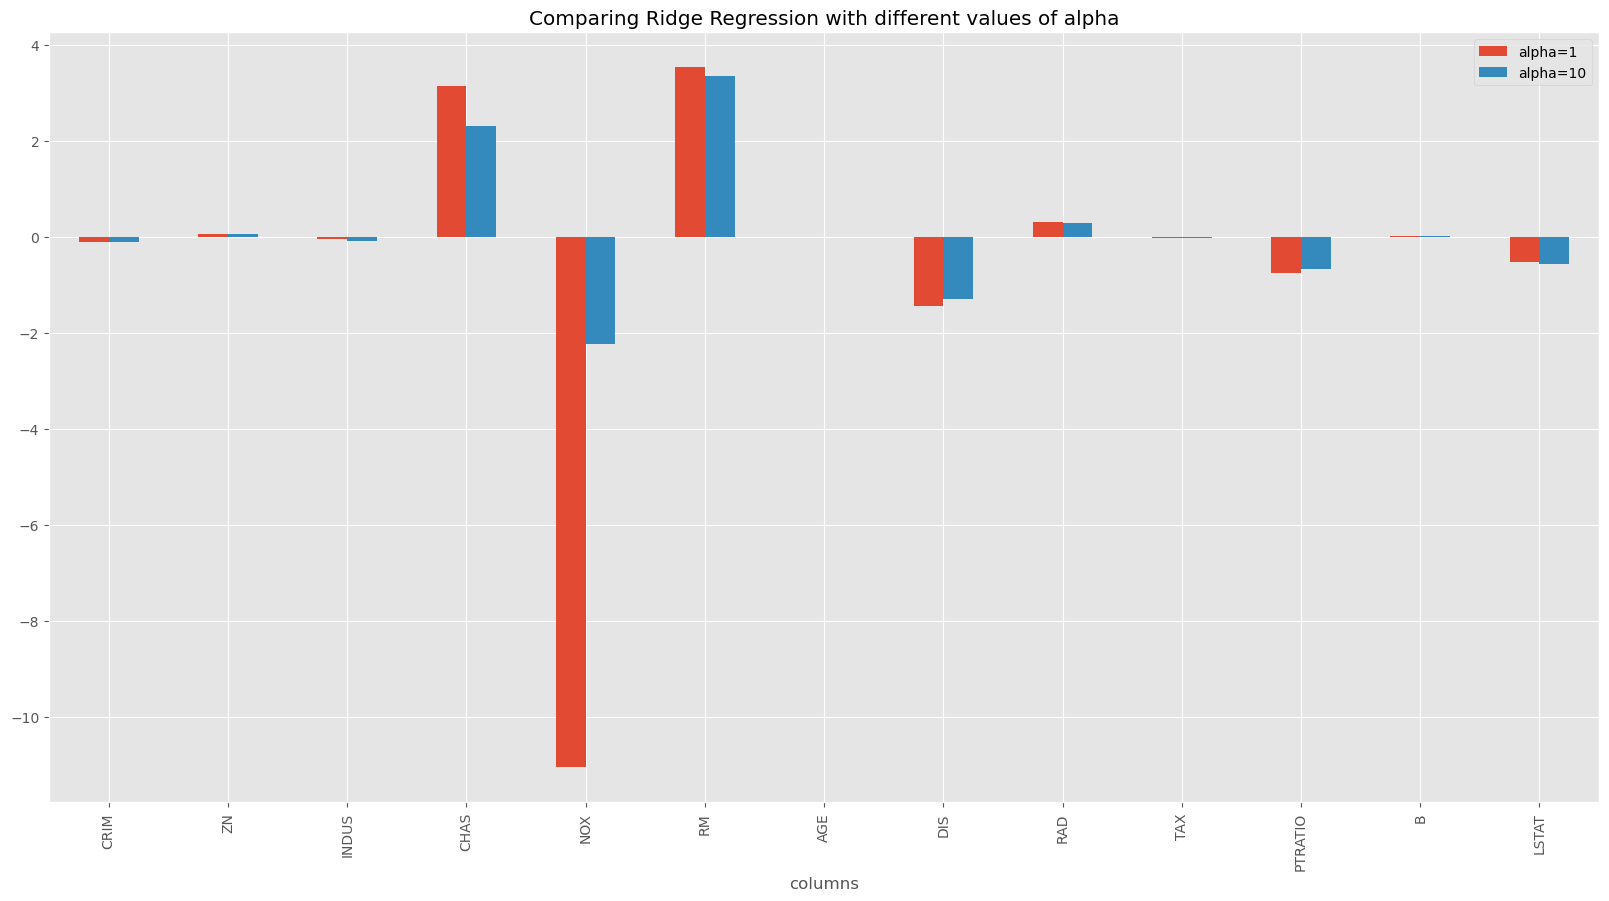

In [35]:
df1=pd.DataFrame()
df1['columns']=ridge_coefficient['Columns']
df1["alpha=1"]=ridge_coefficient['Coefficient Estimate']
df1['alpha=10']=r_coefficient['Coefficient Estimate']
df1.plot(x='columns', kind="bar",title="Comparing Ridge Regression with different values of alpha", figsize=(20,10))

plt.show()

Lasso Regression

In [36]:

# import Lasso regression from sklearn library

from sklearn.linear_model import Lasso
 
# Train the model

lasso = Lasso(alpha = 1)
lasso.fit(x_train, y_train)

y_pred1 = lasso.predict(x_test)
 
# Calculate Mean Squared Error

mean_squared_error = np.mean((y_pred1 - y_test)**2)

print("Mean squared error on test set", mean_squared_error)

lasso_coeff = pd.DataFrame()

lasso_coeff["Columns"] = x_train.columns

lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)
 

print(lasso_coeff)

Mean squared error on test set 27.650860167592413
    Columns  Coefficient Estimate
0      CRIM             -0.071134
1        ZN              0.065694
2     INDUS             -0.023867
3      CHAS              0.000000
4       NOX             -0.000000
5        RM              0.548500
6       AGE              0.030009
7       DIS             -0.702813
8       RAD              0.303840
9       TAX             -0.016380
10  PTRATIO             -0.579983
11        B              0.009667
12    LSTAT             -0.765285


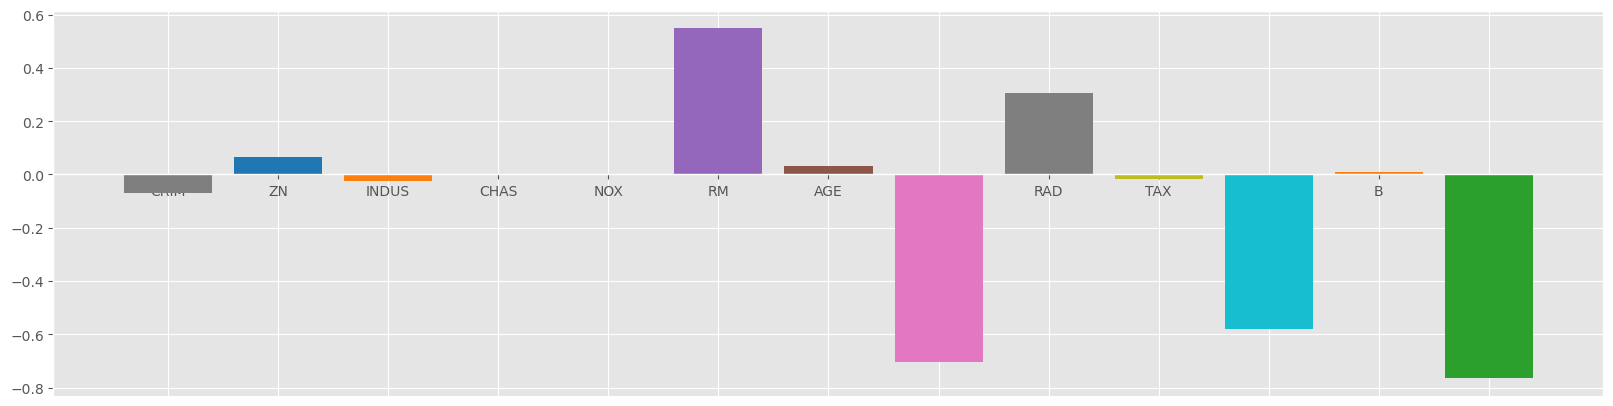

In [37]:
# plotting the coefficient score

fig, ax = plt.subplots(figsize =(20, 5))
 

color =['tab:gray', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 
'tab:gray', 'tab:olive', 'tab:cyan', 'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']
 

ax.bar(lasso_coeff["Columns"], 
lasso_coeff['Coefficient Estimate'], color = color)
 

ax.spines['bottom'].set_position('zero')
 

plt.style.use('ggplot')
plt.show()

Mean squared error on test set 41.9684124378833


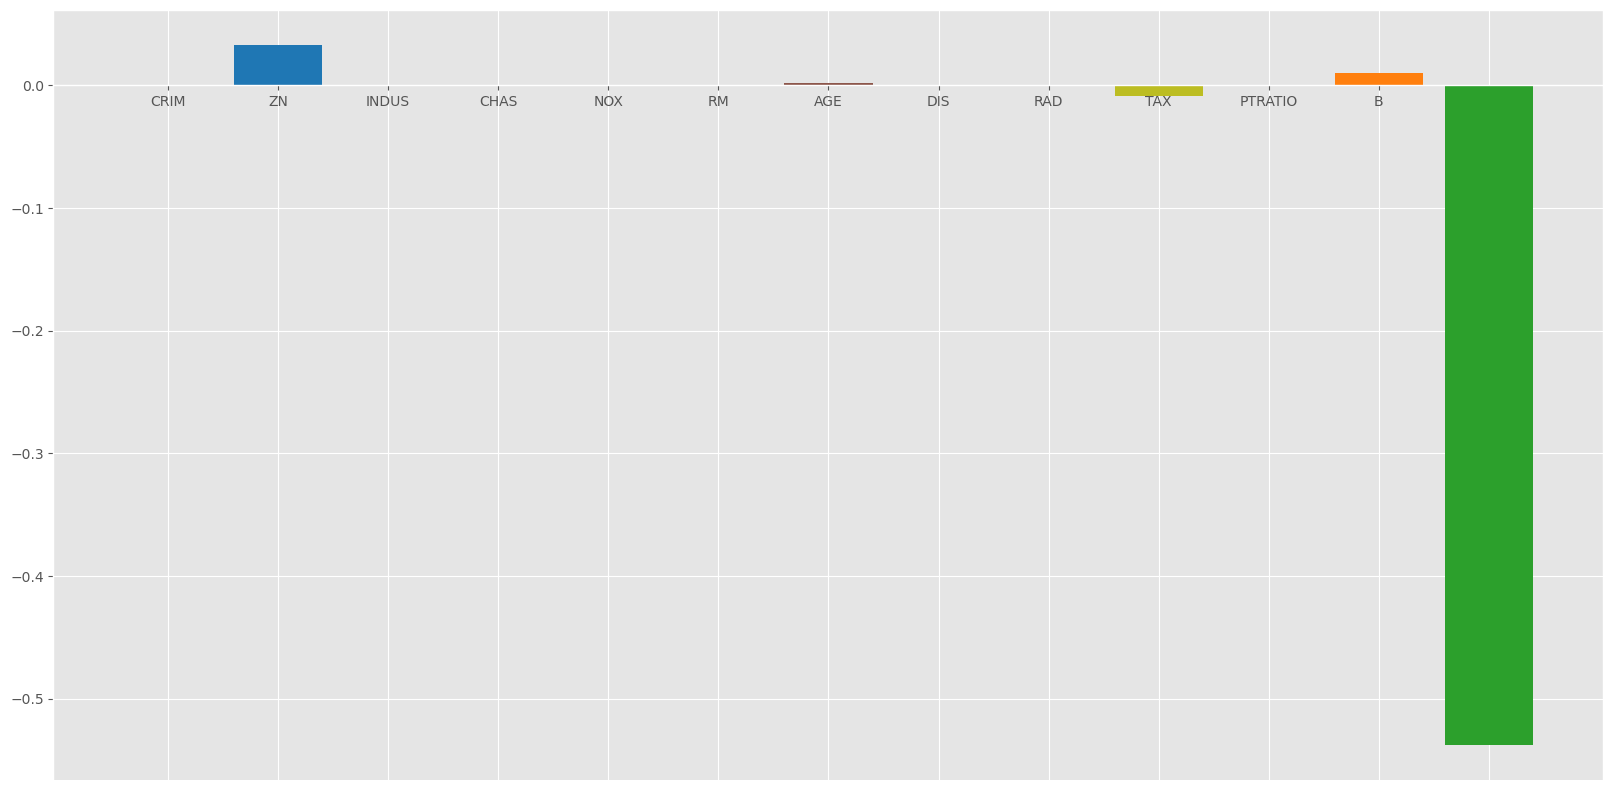

In [38]:
l = Lasso(alpha = 10)
l.fit(x_train, y_train)

y_pred1 = l.predict(x_test)
 
# Calculate Mean Squared Error

mean_squared_error = np.mean((y_pred1 - y_test)**2)

print("Mean squared error on test set", mean_squared_error)

l_coeff = pd.DataFrame()

l_coeff["Columns"] = x_train.columns

l_coeff['Coefficient Estimate'] = pd.Series(l.coef_)

# plotting the coefficient score

fig, ax = plt.subplots(figsize =(20, 10))
 

color =['tab:gray', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 
'tab:gray', 'tab:olive', 'tab:cyan', 'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']
 

ax.bar(l_coeff["Columns"], 
l_coeff['Coefficient Estimate'], color = color)
 

ax.spines['bottom'].set_position('zero')
 

plt.style.use('ggplot')
plt.show()
 

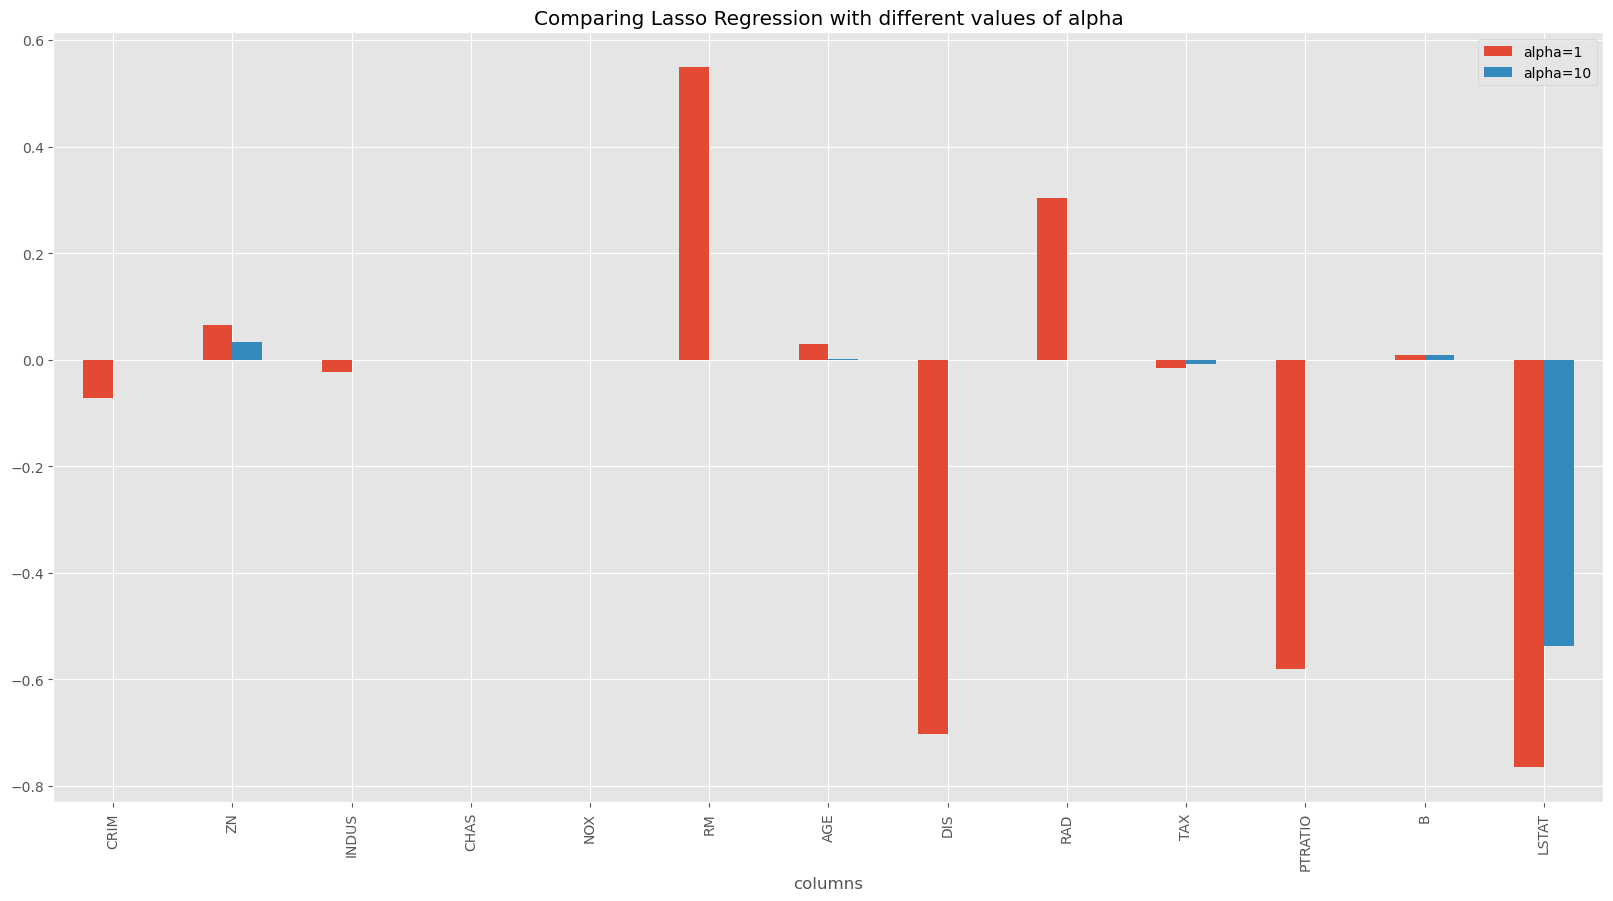

In [39]:
df1=pd.DataFrame()
df1['columns']=lasso_coeff['Columns']
df1["alpha=1"]=lasso_coeff['Coefficient Estimate']
df1['alpha=10']=l_coeff['Coefficient Estimate']
df1.plot(x='columns', kind="bar",title="Comparing Lasso Regression with different values of alpha", figsize=(20,10))

plt.show()

In [40]:

# import model

from sklearn.linear_model import ElasticNet
 
# Train the model

e_net = ElasticNet(alpha = 1)
e_net.fit(x_train, y_train)
 
# calculate the prediction and mean square error

y_pred_elastic = e_net.predict(x_test)

mean_squared_error = np.mean((y_pred_elastic - y_test)**2)

print("Mean Squared Error on test set", mean_squared_error)
 

e_net_coeff = pd.DataFrame()

e_net_coeff["Columns"] = x_train.columns

e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_)
e_net_coeff

Mean Squared Error on test set 26.755486196588244


,Columns,Coefficient Estimate
0,CRIM,-0.085057
1,ZN,0.066203
2,INDUS,-0.053504
3,CHAS,0.000000
4,NOX,-0.000000
5,RM,0.789867
6,AGE,0.028100
7,DIS,-0.789095
8,RAD,0.326616
9,TAX,-0.016607


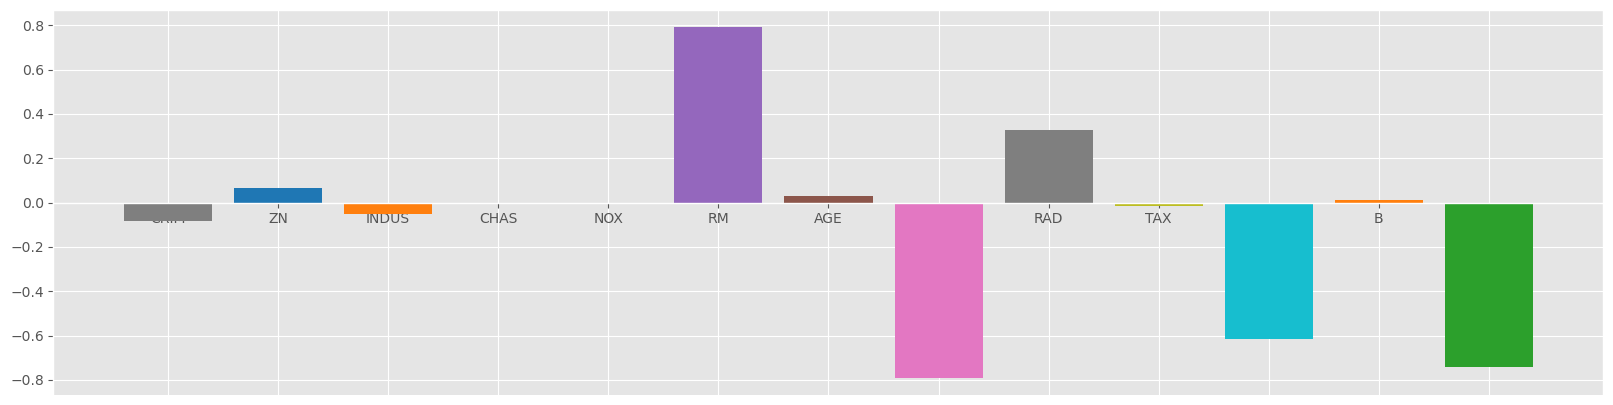

In [41]:
# plotting the coefficient score

fig, ax = plt.subplots(figsize =(20,5))
 

color =['tab:gray', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 
'tab:gray', 'tab:olive', 'tab:cyan', 'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']
 

ax.bar(e_net_coeff["Columns"], 
e_net_coeff['Coefficient Estimate'], color = color)
 

ax.spines['bottom'].set_position('zero')
 

plt.style.use('ggplot')
plt.show()

c:\Users\Admin\anaconda3\envs\myenv\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


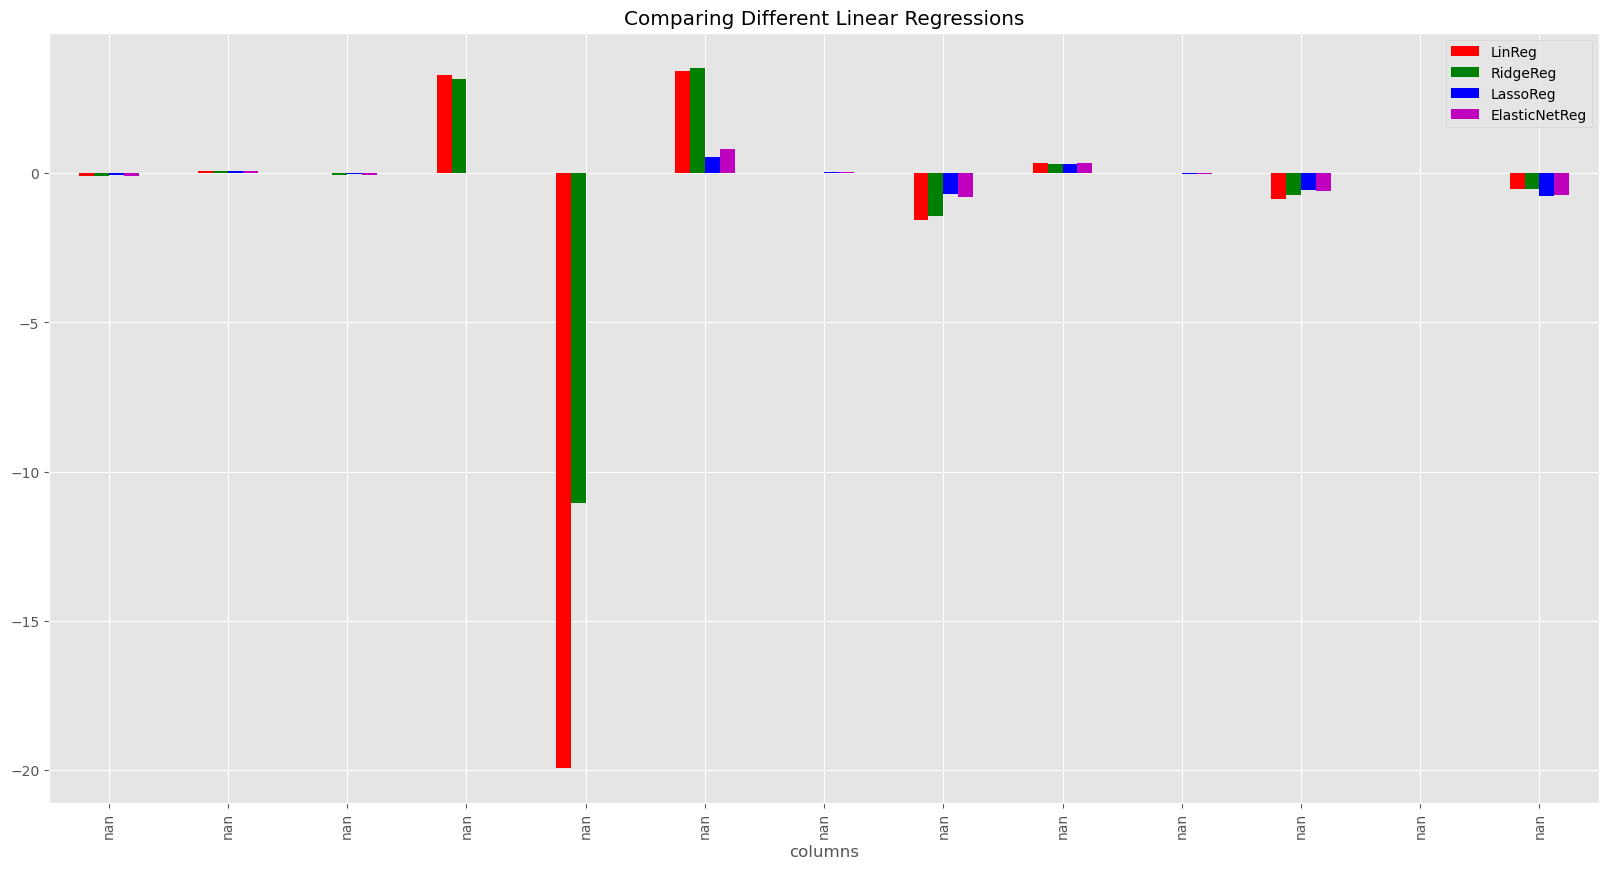

In [45]:
df=pd.DataFrame()
df['columns']=l
df['LinReg']=lr_coefficient['Coefficient Estimate']
df['RidgeReg']=ridge_coefficient['Coefficient Estimate']
df['LassoReg']=lasso_coeff['Coefficient Estimate']
df['ElasticNetReg']=e_net_coeff['Coefficient Estimate']


my_color=['r','g','b','m']

df.plot(x='columns',y=['LinReg','RidgeReg','LassoReg','ElasticNetReg'],kind="bar",title="Comparing Different Linear Regressions", figsize=(20,10),color=my_color)

# Show

plt.show()

From the above comparison we can reach the following conclusion about different regularization methods: 
 

- Regularization is used to reduce the dependence on any particular independent variable by adding the penalty term to the Loss function. This term prevents the coefficients of the independent variables to take extreme values. 
 
- Ridge Regression adds L2 regularization penalty term to loss function. This term reduces the coefficients but does not make them 0 and thus doesn’t eliminate any independent variable completely. It can be used to measure the impact of the different independent variables. 
 
- Lasso Regression adds L1 regularization penalty term to loss function. This term reduces the coefficients as well as makes them 0 thus effectively eliminate the corresponding independent variable completely. It can be used for feature selection etc. 
 
- Elastic Net is a combination of both of the above regularization. It contains both the L1 and L2 as its penalty term. It performs better than Ridge and Lasso Regression for most of the test cases. 